In [1]:

import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
import gc
from tensorflow import keras
from keras import layers
import tensorflow_probability as tfp
import tensorflow as tf
import matplotlib.pyplot as plt
import os
# tf.keras.mixed_precision.set_global_policy("mixed_float16")
physical_devices = tf.config.list_physical_devices('GPU') 
tf.config.experimental.set_memory_growth(physical_devices[0], True)
from dataset import *
from modules import *
from pixel import *
from train import *
from predict import *

LOAD_WEIGHTS = True
CHECKPOINT = './model_weights/new_weights'
PIXEL_CHECKPOINT = './CNNmodel_weights/pixel_weights'




c:\Users\jorda\miniconda3\envs\prac2\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
train_np, test_np, train_imgs, test_imgs, train_variance = load_oasis()

Found 544 files belonging to 1 classes.
Found 9664 files belonging to 1 classes.
<class 'numpy.ndarray'> (2416, 4, 256, 256, 1)
<class 'numpy.ndarray'> (544, 256, 256, 1)


In [3]:
latent_dim = 128
num_embeddings = 32

vqvae_trainer = VQVAETrainer(train_variance, latent_dim, num_embeddings)
vqvae_trainer.compile(optimizer=keras.optimizers.Adam())

history = train_vqvae(vqvae_trainer, train_imgs, num_epochs=20, 
                        CHECKPOINT='./model_weights/new_weights', LOAD_WEIGHTS=LOAD_WEIGHTS)

Model: "encoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 1)]     0         
                                                                 
 conv2d (Conv2D)             (None, 128, 128, 32)      320       
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 128)       8320      
                                                                 
Total params: 27,136
Trainable params: 27,136
Non-trainable params: 0
_________________________________________________________________
Model: "decoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 6

dict_keys(['loss', 'reconstruction_loss', 'vqvae_loss'])


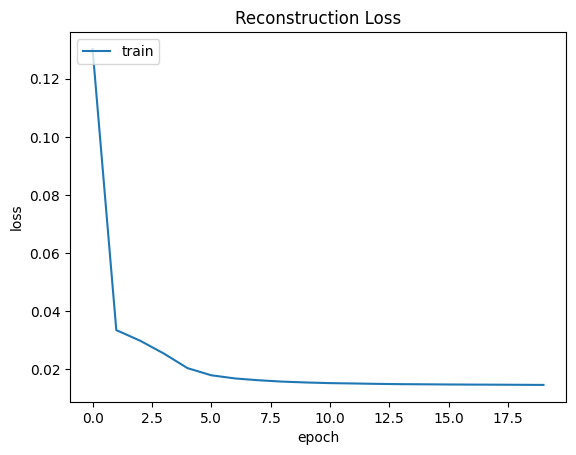

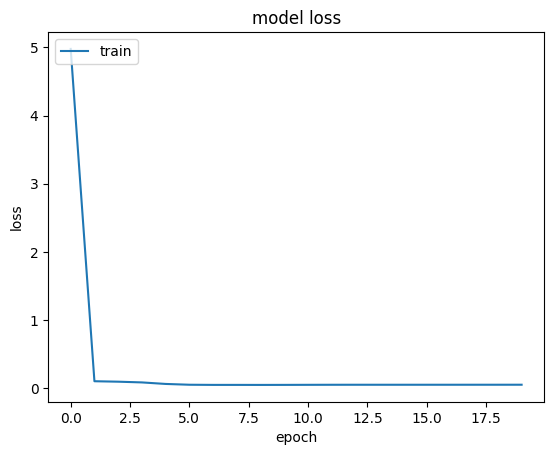

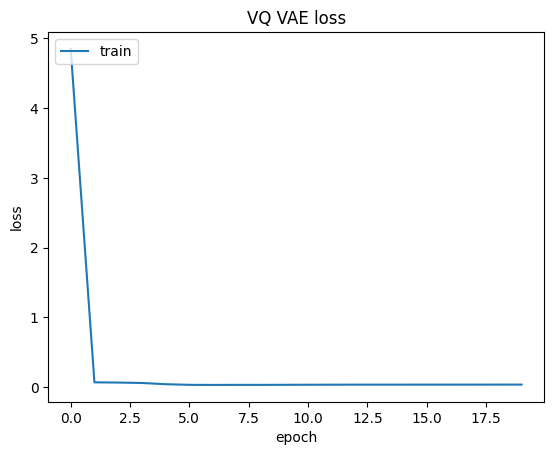

In [4]:
if not LOAD_WEIGHTS:
    plot_training(history)

1/1 [==============================] - 0s 431ms/step


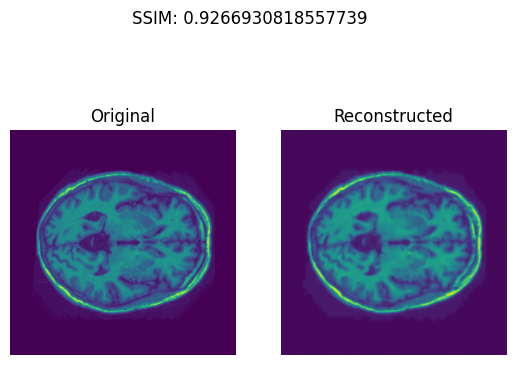

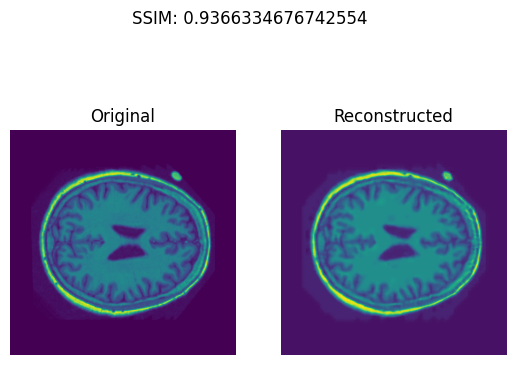

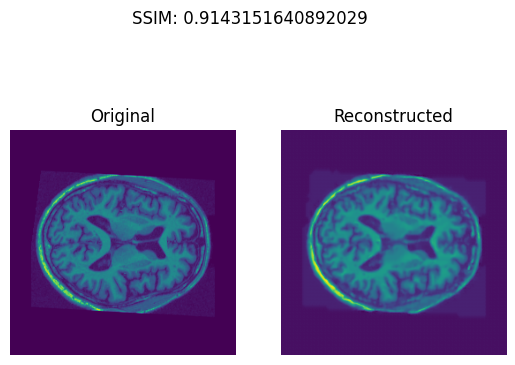

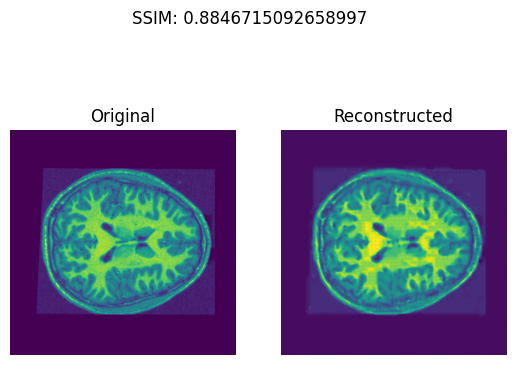

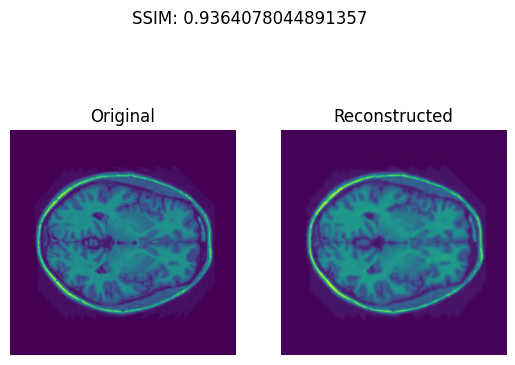

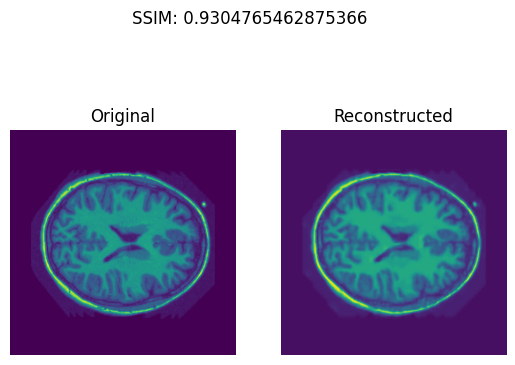

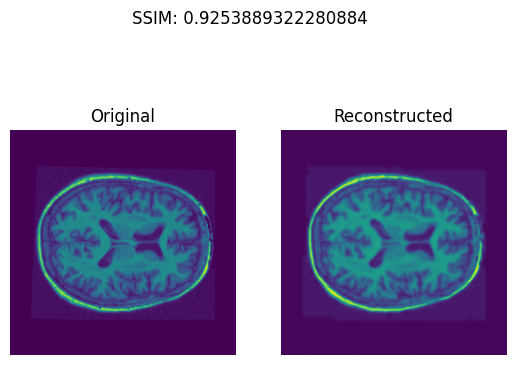

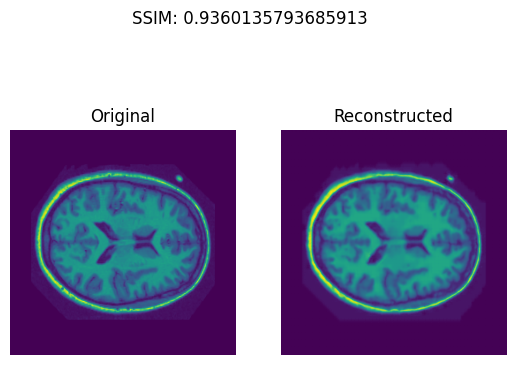

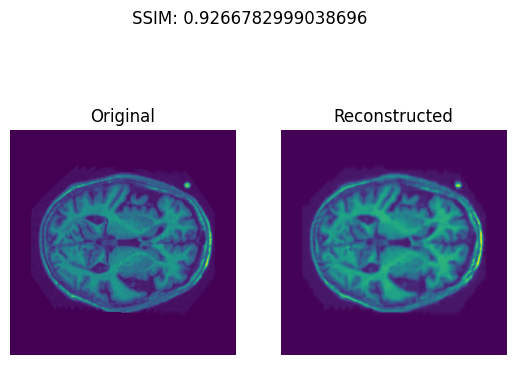

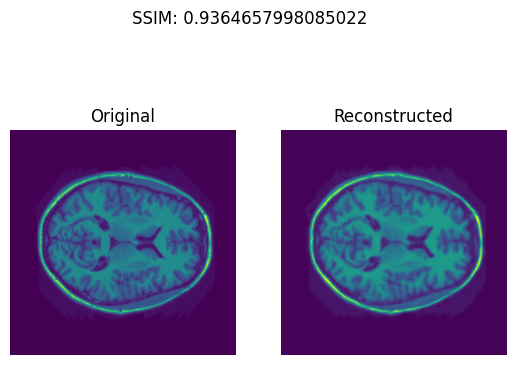

1/1 [==============================] - 0s 71ms/step


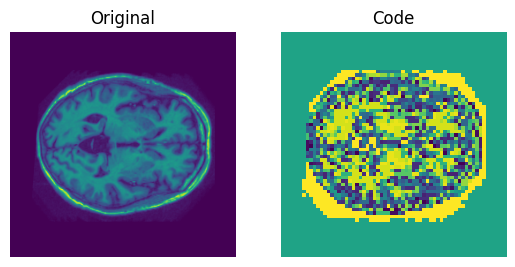

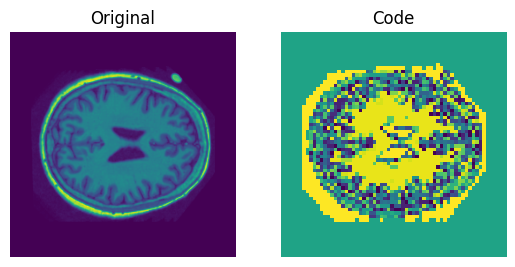

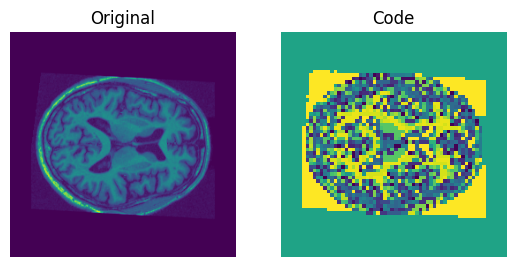

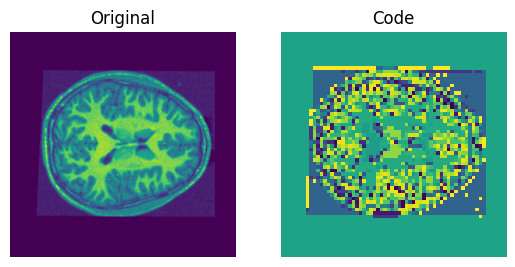

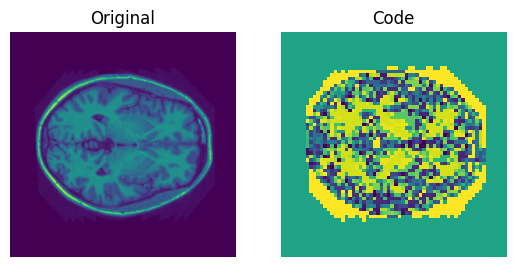

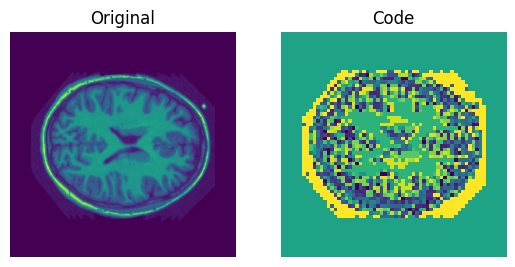

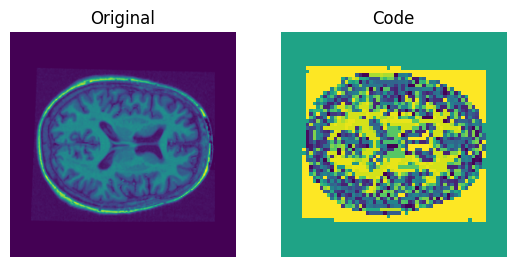

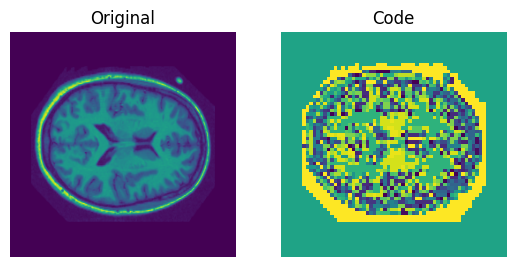

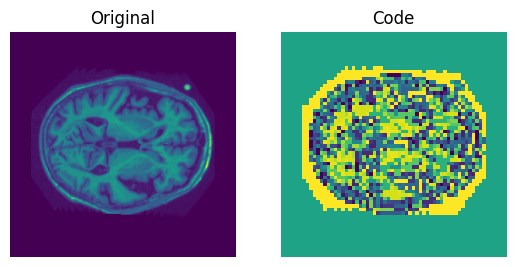

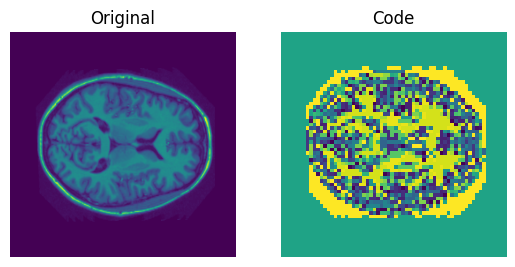

In [5]:
encoder_output_shape = reconstruct_oasis(vqvae_trainer, test_np)

Now that the Auto-Encoder has been trained and built, a CNN can be used to provide the generative aspect of the task. The process is:
- Pass images to the encoder
- Obtain the latent representation (encoding, using the VQ)
- Pass the encoded representation to the PixelCNN 
- Use the PixelCNN to generate a new encoded representation (training)
- Once trained, use the PixelCNN to generate encodings from random noise (?)




In [6]:
pixel_cnn = initialise_pixel(encoder_output_shape, vqvae_trainer)
pixel_cnn_model = pixel_cnn.model
codebook_indices = prepare_encodings(train_np, vqvae_trainer)
train_pixel(pixel_cnn_model, codebook_indices, 300, PIXEL_CHECKPOINT, LOAD_WEIGHTS=False)


Input shape of the PixelCNN: (64, 64)
 729/1000 [====================>.........] - ETA: 0s

ResourceExhaustedError: Graph execution error:

Detected at node 'encoder/conv2d_1/Conv2D' defined at (most recent call last):
    File "c:\Users\jorda\miniconda3\envs\prac2\lib\runpy.py", line 196, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "c:\Users\jorda\miniconda3\envs\prac2\lib\runpy.py", line 86, in _run_code
      exec(code, run_globals)
    File "c:\Users\jorda\miniconda3\envs\prac2\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "c:\Users\jorda\miniconda3\envs\prac2\lib\site-packages\traitlets\config\application.py", line 976, in launch_instance
      app.start()
    File "c:\Users\jorda\miniconda3\envs\prac2\lib\site-packages\ipykernel\kernelapp.py", line 712, in start
      self.io_loop.start()
    File "c:\Users\jorda\miniconda3\envs\prac2\lib\site-packages\tornado\platform\asyncio.py", line 215, in start
      self.asyncio_loop.run_forever()
    File "c:\Users\jorda\miniconda3\envs\prac2\lib\asyncio\base_events.py", line 600, in run_forever
      self._run_once()
    File "c:\Users\jorda\miniconda3\envs\prac2\lib\asyncio\base_events.py", line 1896, in _run_once
      handle._run()
    File "c:\Users\jorda\miniconda3\envs\prac2\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "c:\Users\jorda\miniconda3\envs\prac2\lib\site-packages\ipykernel\kernelbase.py", line 510, in dispatch_queue
      await self.process_one()
    File "c:\Users\jorda\miniconda3\envs\prac2\lib\site-packages\ipykernel\kernelbase.py", line 499, in process_one
      await dispatch(*args)
    File "c:\Users\jorda\miniconda3\envs\prac2\lib\site-packages\ipykernel\kernelbase.py", line 406, in dispatch_shell
      await result
    File "c:\Users\jorda\miniconda3\envs\prac2\lib\site-packages\ipykernel\kernelbase.py", line 730, in execute_request
      reply_content = await reply_content
    File "c:\Users\jorda\miniconda3\envs\prac2\lib\site-packages\ipykernel\ipkernel.py", line 383, in do_execute
      res = shell.run_cell(
    File "c:\Users\jorda\miniconda3\envs\prac2\lib\site-packages\ipykernel\zmqshell.py", line 528, in run_cell
      return super().run_cell(*args, **kwargs)
    File "c:\Users\jorda\miniconda3\envs\prac2\lib\site-packages\IPython\core\interactiveshell.py", line 2881, in run_cell
      result = self._run_cell(
    File "c:\Users\jorda\miniconda3\envs\prac2\lib\site-packages\IPython\core\interactiveshell.py", line 2936, in _run_cell
      return runner(coro)
    File "c:\Users\jorda\miniconda3\envs\prac2\lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "c:\Users\jorda\miniconda3\envs\prac2\lib\site-packages\IPython\core\interactiveshell.py", line 3135, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "c:\Users\jorda\miniconda3\envs\prac2\lib\site-packages\IPython\core\interactiveshell.py", line 3338, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "c:\Users\jorda\miniconda3\envs\prac2\lib\site-packages\IPython\core\interactiveshell.py", line 3398, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\jorda\AppData\Local\Temp\ipykernel_6108\3786512609.py", line 1, in <cell line: 1>
      encoder_output_shape = reconstruct_oasis(vqvae_trainer, test_np)
    File "g:\My Drive\COMP3710\Report\PatternFlow\recognition\45367601_OASIS_VQVAE\predict.py", line 38, in reconstruct_oasis
      encoded_outputs = encoder.predict(test_images)
    File "c:\Users\jorda\miniconda3\envs\prac2\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\jorda\miniconda3\envs\prac2\lib\site-packages\keras\engine\training.py", line 2033, in predict
      tmp_batch_outputs = self.predict_function(iterator)
    File "c:\Users\jorda\miniconda3\envs\prac2\lib\site-packages\keras\engine\training.py", line 1845, in predict_function
      return step_function(self, iterator)
    File "c:\Users\jorda\miniconda3\envs\prac2\lib\site-packages\keras\engine\training.py", line 1834, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\jorda\miniconda3\envs\prac2\lib\site-packages\keras\engine\training.py", line 1823, in run_step
      outputs = model.predict_step(data)
    File "c:\Users\jorda\miniconda3\envs\prac2\lib\site-packages\keras\engine\training.py", line 1791, in predict_step
      return self(x, training=False)
    File "c:\Users\jorda\miniconda3\envs\prac2\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\jorda\miniconda3\envs\prac2\lib\site-packages\keras\engine\training.py", line 490, in __call__
      return super().__call__(*args, **kwargs)
    File "c:\Users\jorda\miniconda3\envs\prac2\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\jorda\miniconda3\envs\prac2\lib\site-packages\keras\engine\base_layer.py", line 1014, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "c:\Users\jorda\miniconda3\envs\prac2\lib\site-packages\keras\utils\traceback_utils.py", line 92, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\jorda\miniconda3\envs\prac2\lib\site-packages\keras\engine\functional.py", line 458, in call
      return self._run_internal_graph(
    File "c:\Users\jorda\miniconda3\envs\prac2\lib\site-packages\keras\engine\functional.py", line 596, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "c:\Users\jorda\miniconda3\envs\prac2\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\jorda\miniconda3\envs\prac2\lib\site-packages\keras\engine\base_layer.py", line 1014, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "c:\Users\jorda\miniconda3\envs\prac2\lib\site-packages\keras\utils\traceback_utils.py", line 92, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\jorda\miniconda3\envs\prac2\lib\site-packages\keras\layers\convolutional\base_conv.py", line 250, in call
      outputs = self.convolution_op(inputs, self.kernel)
    File "c:\Users\jorda\miniconda3\envs\prac2\lib\site-packages\keras\layers\convolutional\base_conv.py", line 225, in convolution_op
      return tf.nn.convolution(
Node: 'encoder/conv2d_1/Conv2D'
OOM when allocating tensor with shape[2,64,64,64] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[{{node encoder/conv2d_1/Conv2D}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info. This isn't available when running in Eager mode.
 [Op:__inference_predict_function_248369]

1/1 [==============================] - 0s 32ms/step
Prior shape: (10, 64, 64)
1/1 [==============================] - 0s 74ms/step


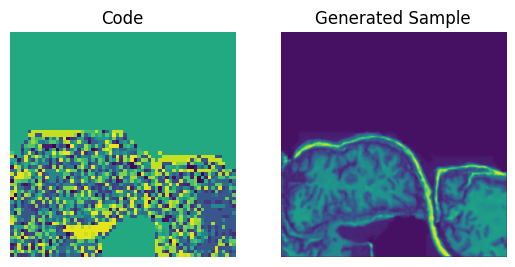

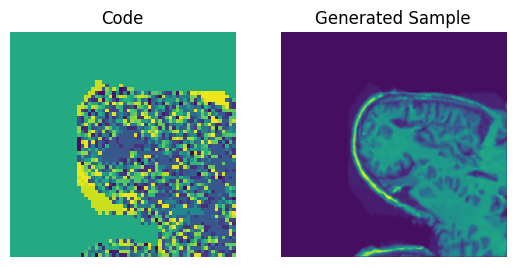

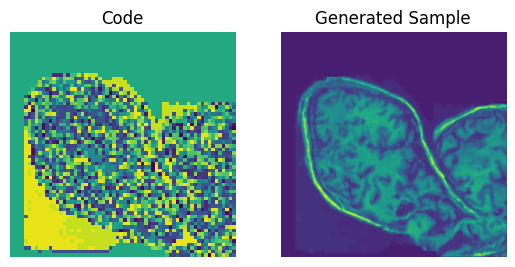

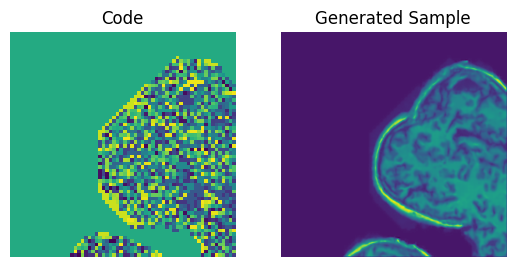

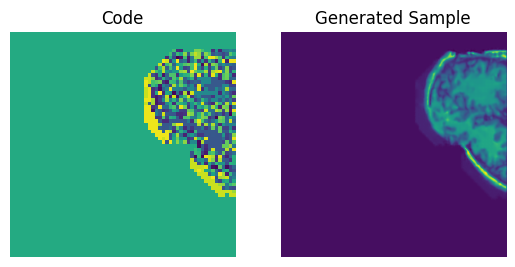

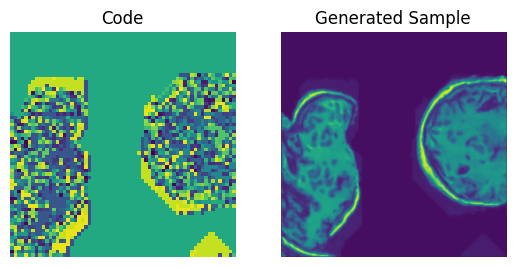

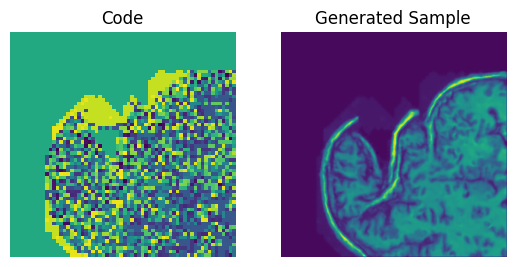

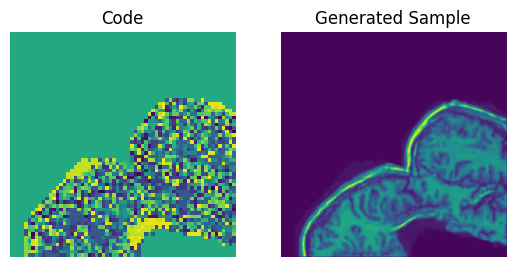

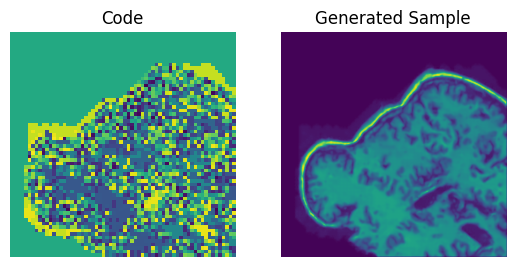

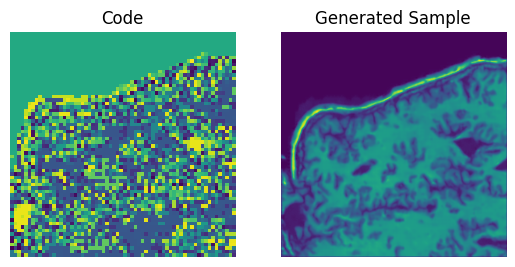

In [ ]:
sampler_model = get_sampler(pixel_cnn_model)
priors = get_priors(pixel_cnn_model, sampler_model)
quantized_priors = quantize_priors(priors, vqvae_trainer, encoder_output_shape)
generator(vqvae_trainer, quantized_priors, priors)